In [3]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 6:  ODE Methods - Initial Value Problems

For all of these questions write your own functions for the ODE solvers and Newton's method (you can copy from your previous homework of course).

## Question 1 - Orbits

Newton's equations for the motion of a particle (he sure gets around doesn't he) in planar orbit with eccentricity $e$ where $0 < e < 1$ are

$$\begin{aligned}
    x''(t) &= -\frac{x}{r^3}, ~~~~ &x(0) &= 1 - e, ~~~~ &x'(0) &= 0, \\
    y''(t) &= -\frac{y}{r^3}, ~~~~ &y(0) &= 0, ~~~~ &y'(0) &= \sqrt{\frac{1 + e}{1 - e}}
\end{aligned}$$

with $r^2 = x^2 + y^2.$

**(a)** [5] Reformulate the problem as an initial value problem for a system of first-order differential equations.

Solution: Combine information of $u$ and $u'$ to get the system we need,
$$
u = \begin{bmatrix} x \\ x' \\ y \\ y' \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \\ u_4 \end{bmatrix}
$$

with
$$
u' = \begin{bmatrix} x' \\ x'' \\ y' \\ y'' \end{bmatrix} = \begin{bmatrix} u_2 \\ -\frac{u_1}{r^3} \\ u_4 \\ -\frac{u_3}{r^3} \end{bmatrix}  ~~~\text{and} ~~~ u(0) = \begin{bmatrix} 1-e \\ 0 \\ 0 \\ \sqrt{\frac{1+e}{1-e}} \end{bmatrix} 
$$

**(b)** [5] Write a function that computes the solution to the IVP from (b) given a provided set of time steps and eccentricity $e$ using a 2nd order Runge-Kutta method.  The function should only return the values of $x$ and $y$.

In [13]:
def solve_orbit_RK2(t, e):
    f = lambda u: numpy.array([u[1], -u[0] / (u[0]**2 + u[2]**2)**(1.5), u[3], -u[2] / (u[0]**2 + u[2]**2)**(1.5)])
    U = numpy.empty((t.shape[0], 4))
    # IC
    U[0, :] = [1.0-e, 0.0, 0.0, numpy.sqrt((1.0+e)/(1.0-e))]
    dt = t[1] - t[0]
    
    # given the set of t steps
    for n in range(len(t) -1):
   # compute 2nd order
        U_star = U[n, :] + 0.5 * dt * f(U[n, :])
        U[n+1, :] = U[n, :] + dt * f(U_star)
        
    x = U[0,:]
    y = U[2,:]
    return x, y

In [14]:
# Testing to make sure that the solution remains bounded in the testing interval
x, y = solve_orbit_RK2(numpy.linspace(0.0, 10.0, 1000), 0.9)
assert(numpy.all(numpy.abs(x) < 10.0))
assert(numpy.all(numpy.abs(y) < 10.0))
print("Solutions remained bounded for testing interval.")

Solutions remained bounded for testing interval.


**(c)** [5] Plot the trajectory of the orbiting particle parametrically given $e = 0.9$ and times between $t = [0, 100]$.

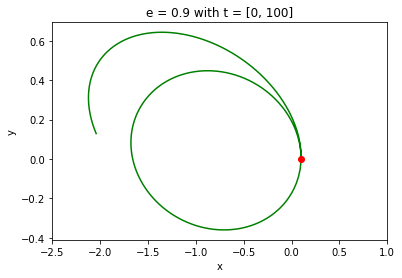

In [6]:
e = 0.9
t = numpy.linspace(0.0, 10.0, 1000)
x, y = solve_orbit_RK2(t, e)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

#plot
axes.plot(x, y, 'g')
axes.plot(x[0], y[0], 'ro', label = "point")
axes.set_title("e = 0.9 with t = [0, 100]")
axes.set_xlabel("x")
axes.set_xlim((-2.5,1))
axes.set_ylabel("y")

plt.show()

## Question 2 - Absolute Stability Regions and Order Stars

**(a)** [15] Plot the regions of absolute stability for the following:
1. Taylor Series methods of order 2 to 5,
1. 3-step and 4-step Adams-Basforth methods, and
1. 3-step and 4-step Adams-Moulton methods.

For the Taylor series methods also determine the interior and exterior of the stability regions.

Taylor Series Method of Order 2:
  inside region -  0.5
  outside region -  5.0
Taylor Series Method of Order 3:
  inside region -  0.33333333333333337
  outside region -  5.666666666666666
Taylor Series Method of Order 4:
  inside region -  0.37500000000000006
  outside region -  5.0
Taylor Series Method of Order 5:
  inside region -  0.3666666666666667
  outside region -  3.533333333333333


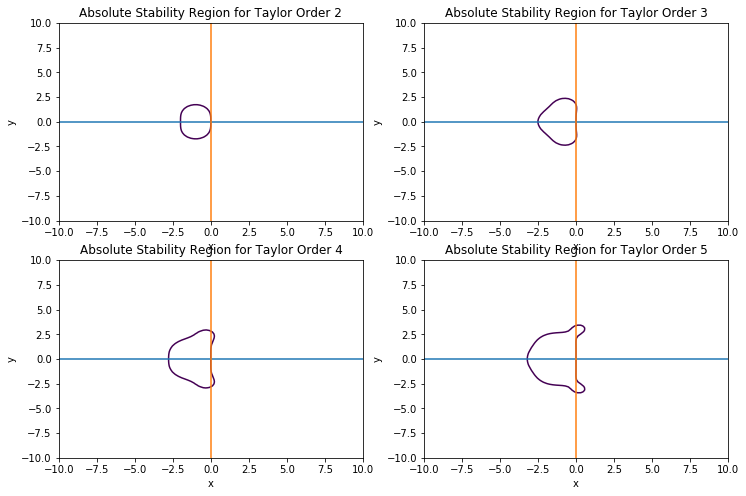

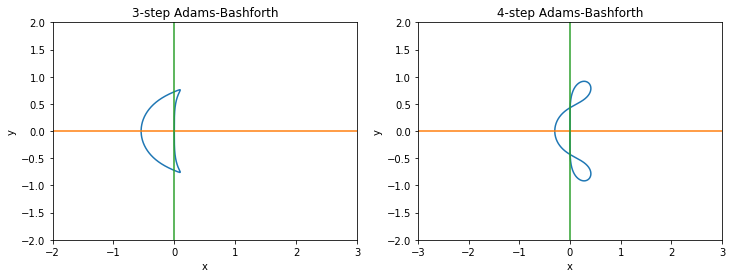

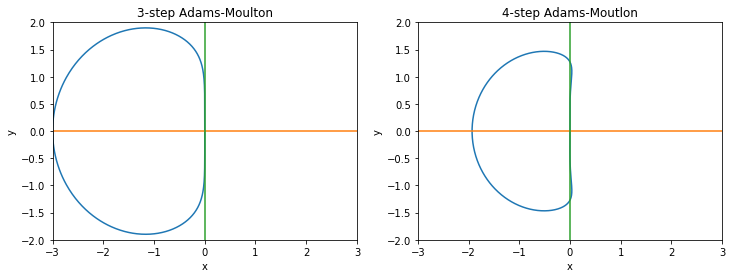

In [58]:
x = numpy.linspace(-10, 10, 100)
y = numpy.linspace(-10, 10, 100)
X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

# Taylor Series expansion of order 2 to 5
T_2 = lambda z: 1.0 + z + 0.5 * z**2
T_3 = lambda z: 1.0 + z + 0.5 * z**2 + 1.0 / 6.0 * z**3
T_4 = lambda z: 1.0 + z + 0.5 * z**2 + 1.0 / 6.0 * z**3 + 1.0 / 24.0 * z**4
T_5 = lambda z: 1.0 + z + 0.5 * z**2 + 1.0 / 6.0 * z**3 + 1.0 / 24.0 * z**4 + 1.0 / 120.0 * z**5

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.set_figheight(fig.get_figheight() * 2.0)
        
axes = fig.add_subplot(2, 2, 1)
axes.contour(X, Y, numpy.abs(T_2(Z)), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)
axes.set_title("Absolute Stability Region for Taylor Order 2")
axes.set_xlabel("x")
axes.set_ylabel("y")

axes = fig.add_subplot(2, 2, 2)
axes.contour(X, Y, numpy.abs(T_3(Z)), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("Absolute Stability Region for Taylor Order 3")
axes.set_xlabel("x")
axes.set_ylabel("y")

axes = fig.add_subplot(2, 2, 3)
axes.contour(X, Y, numpy.abs(T_4(Z)), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("Absolute Stability Region for Taylor Order 4")
axes.set_xlabel("x")
axes.set_ylabel("y")

axes = fig.add_subplot(2, 2, 4)
axes.contour(X, Y, numpy.abs(T_5(Z)), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("Absolute Stability Region for Taylor Order 5")
axes.set_xlabel("x")
axes.set_ylabel("y")

print("Taylor Series Method of Order 2:")
print("  inside region - ", numpy.abs(T_2(-1.0)))
print("  outside region - ", numpy.abs(T_2(-4.0)))

print("Taylor Series Method of Order 3:")
print("  inside region - ", numpy.abs(T_3(-1.0)))
print("  outside region - ", numpy.abs(T_3(-4.0)))

print("Taylor Series Method of Order 4:")
print("  inside region - ", numpy.abs(T_4(-1.0)))
print("  outside region - ", numpy.abs(T_4(-4.0)))

print("Taylor Series Method of Order 5:")
print("  inside region - ", numpy.abs(T_5(-1.0)))
print("  outside region - ", numpy.abs(T_5(-4.0)))


# 3 and 4 step Adams-Bashforth
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
xi = numpy.exp(1j * theta)

# similar to 2 step AB
rho_3AB = lambda xi: (xi - 1.0) * xi**2
sigma_3AB = lambda xi: ((23.0 * xi - 16.0) * xi + 5.0) / 12.0
z_3AB = lambda xi: rho_3AB(xi) / sigma_3AB(xi) 

rho_4AB = lambda xi: (xi - 1.0) * xi**3
sigma_4AB = lambda xi: (((55.0 * xi - 59.0) * xi + 37.0) * xi - 9.0) / 24.0
z_4AB = lambda xi: rho_4AB(xi) / sigma_4AB(xi)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)

axes = fig.add_subplot(1, 2, 1)
axes.plot(z_3AB(xi).real, z_3AB(xi).imag)
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("3-step Adams-Bashforth")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_xlim([-2, 3])
axes.set_ylim([-2, 2])

axes = fig.add_subplot(1, 2, 2)
axes.plot(z_4AB(xi).real, z_4AB(xi).imag)
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("4-step Adams-Bashforth")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_xlim([-3, 3])
axes.set_ylim([-2, 2])
                       
# 3 and 4 step Adams-Moulton
theta = numpy.linspace(0.0, 2.0 * numpy.pi, 1000)
xi = numpy.exp(1j * theta)

rho_3AM = lambda xi: (xi - 1.0) * xi**2
sigma_3AM = lambda xi: (((9.0 * xi + 19.0) * xi - 5.0) * xi + 1.0) / 24.0
z_3AM = lambda xi: rho_3AM(xi) / sigma_3AM(xi) 

rho_4AM = lambda xi: (xi - 1.0) * xi**3
sigma_4AM = lambda xi: ((((251.0 * xi + 646.0) * xi - 264.0) * xi + 106.0) - 19.0) * xi / 720
z_4AM = lambda xi: rho_4AM(xi) / sigma_4AM(xi)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)

axes = fig.add_subplot(1, 2, 1)
axes.plot(z_3AM(xi).real, z_3AM(xi).imag)
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("3-step Adams-Moulton")
axes.set_xlabel("x")           
axes.set_ylabel("y")
axes.set_xlim([-3, 3])
axes.set_ylim([-2, 2])

axes = fig.add_subplot(1, 2, 2)
axes.plot(z_4AM(xi).real, z_4AM(xi).imag)
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)
axes.set_title("4-step Adams-Moutlon")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_xlim([-3, 3])
axes.set_ylim([-2, 2])


plt.show()

**(b)** [15] The region of absolute stability as defined ensures that the error does not grow in subsequent time-steps hence why we require $|R(z)| < 1$.  In reality what we really want is that the errors decay faster than the solution or that it grows slower than the true solution.  Consider the solution of an ODE $u(t) = e^{\lambda t}$, if $\lambda < 0$ then we want our errors made at each time step $E^n$ to decay faster than $e^{\lambda t}$ so that $|E^n| < e^{\lambda t}$.  Conversely if $\lambda > 0$ then we might also want $|E^n| < e^{\lambda t}$.  This suggests a new definition of stability, called the **relative stability** defined as

$$|R(z)| \leq |e^z|.$$

These turn out to be difficult to plot but proved pivotal due to work in 1978 by Wanner, Hairer and Nørset.  More recently a new set of regions, called **order stars**, have become more popular to consider.  These are defined as the three regions

$$\begin{aligned}
    \mathcal{A}_{-} &= \{ z \in \mathbb{C}: |R(z)| < |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| < 1\}, \\ 
    \mathcal{A}_{0} &= \{ z \in \mathbb{C}: |R(z)| = |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| = 1\}, ~~~~\text{and} \\
    \mathcal{A}_{+} &= \{ z \in \mathbb{C}: |R(z)| > |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| > 1\}.
\end{aligned}$$

Plot the region $\mathcal{A}_{0}$ for the Taylor series methods asked for in part (a).  Do you see any relation to the number of "fingers" and the order of the method?

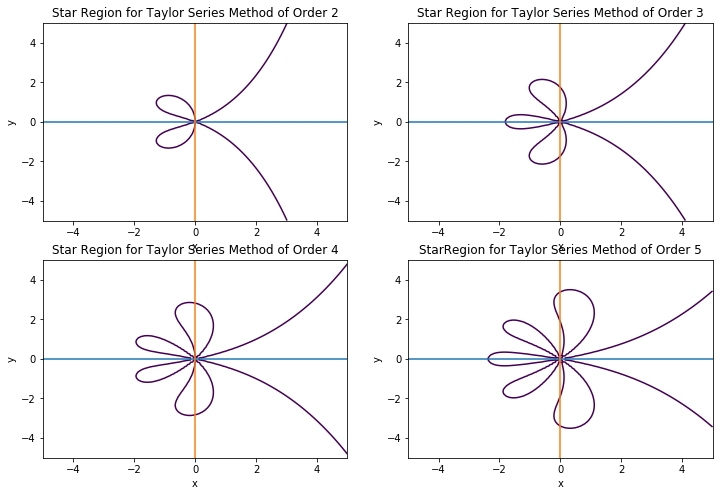

In [9]:
x = numpy.linspace(-5, 5, 100)
y = numpy.linspace(-5, 5, 100)
X, Y = numpy.meshgrid(x, y)
Z = X + 1j * Y

# Taylor Series methods of order 2 to 5 
T_2 = lambda z: 1.0 + z + 0.5 * z**2
T_3 = lambda z: 1.0 + z + 0.5 * z**2 + 1.0 / 6.0 * z**3
T_4 = lambda z: 1.0 + z + 0.5 * z**2 + 1.0 / 6.0 * z**3 + 1.0 / 24.0 * z**4
T_5 = lambda z: 1.0 + z + 0.5 * z**2 + 1.0 / 6.0 * z**3 + 1.0 / 24.0 * z**4 + 1.0 / 120.0 * z**5


fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.set_figheight(fig.get_figheight() * 2.0)

axes = fig.add_subplot(2, 2, 1)
axes.contour(X, Y, numpy.abs(numpy.exp(-Z) * T_2(Z)), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("Star Region for Taylor Series Method of Order 2")
axes.set_xlabel("x")
axes.set_ylabel("y")

axes = fig.add_subplot(2, 2, 2)
axes.contour(X, Y, numpy.abs(numpy.exp(-Z) * T_3(Z)), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("Star Region for Taylor Series Method of Order 3")
axes.set_xlabel("x")
axes.set_ylabel("y")

axes = fig.add_subplot(2, 2, 3)
axes.contour(X, Y, numpy.abs(numpy.exp(-Z) * T_4(Z)), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("Star Region for Taylor Series Method of Order 4")
axes.set_xlabel("x")
axes.set_ylabel("y")

axes = fig.add_subplot(2, 2, 4)
axes.contour(X, Y, numpy.abs(numpy.exp(-Z) * T_5(Z)), levels=[1.0])
axes.plot(x, numpy.zeros(x.shape))
axes.plot(numpy.zeros(y.shape), y)

axes.set_title("StarRegion for Taylor Series Method of Order 5")
axes.set_xlabel("x")
axes.set_ylabel("y")

plt.show()

Solution: We can see from the pics clearly that the number of "fingers" equals the order of Taylor Series.

## Question 3 - Poincaré-Bendixson

The Poincaré-Bendixson theorem describes the behavior of two-dimensional ODE systems that under certain conditions a system will exhibit either a stable equilibrium point or contains a limit cycle (such as we see in an oscillator).

**Poincaré-Bendixson Theorem:**  The attractor for any smooth two-dimensional bounded continuous-time autonomous system is either a stable equilibrium or a limit cycle.

Now consider the system
$$\begin{aligned}
    \frac{dx}{dt} &= \frac{xy}{x^2 + y^2} - \alpha x, \\
    \frac{dy}{dt} &= \frac{y^2}{x^2 + y^2} - \beta y + \beta -1 
\end{aligned}$$
with $\alpha, \beta \in \mathbb{R}$.  

**(a)** [5] What point may be problematic for us in our equations above and violate the Poincaré-Bendixson theorem?

Solution: We can see from the system and find that the problematic point is the origin (0, 0) since we cannot derive the partial differentiation for x or y and cannot satisfy the smoothness for the system. The origin will blow up to violate the theorem.

**(b)**  [5] Formulate the system 
$\frac{d}{dt}\mathbf{u} = f(t, \mathbf{u})$ where $\mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} $

Solution: For u = u(x, y),

$$\mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix}$$

Then

$$\frac{d}{dt}\mathbf{u} = \frac{d}{dt} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} \frac{xy}{x^2 + y^2} - \alpha x \\ \frac{y^2}{x^2 + y^2} - \beta y + \beta -1  \end{bmatrix} = \begin{bmatrix} \frac{u_1u_2}{u_1^2 + u_2^2} - \alpha u_1 \\ \frac{u_2^2}{u_1^2 + u_2^2} - \beta u_2 + \beta -1  \end{bmatrix} = f(t, \mathbf{u}) = f
$$

**(c)** [15] Solve the above system numerically using a predictor-corrector method with the 3-step Adams-Bashforth as the predictor and the 3-step Adams-Moulton method as the corrector.  Use RK2 to boot-strap (start) the method.  Use the initial condition
$$
    (x_0, y_0) = (1, 0)
$$
and
$$
    \alpha = 0 ~~~ \text{and} ~~~ \beta = 0.7.
$$
Plot the phase-plane solution ($x$ vs. $y$) for $t_f$ at least out to $t = 100$.  Comment on what you see making sure to connect it to the Poincaré-Bendixson theorem.  You also may want to play with the initial condition and shorter time spans to examine the behavior around a particular point.

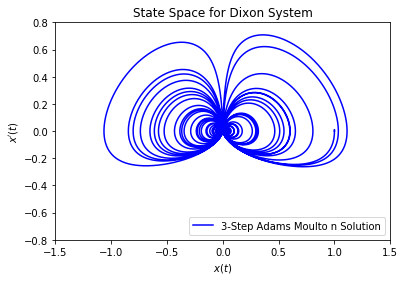

In [73]:
def f(t, u0, alpha = 0, beta = 0.7): 
    a = (1.0 / (u0[0]**2 + u0[1]**2))*u0[0]*u0[1] - alpha * u0[0]
    b = (1.0 / (u0[0]**2 + u0[1]**2)) * (u0[1]**2) - beta * u0[1] + beta - 1.0 
    
    return numpy.array([a, b])

# start IC
n = 10000
t = numpy.linspace(0, 150, n)
dt = t[1] - t[0]
u = numpy.empty((2, t.shape[0]))
u[:, 0] = numpy.array([1, 0])

# 1 and 2 step
u[:,1] = u[:,0] + 0.5 * dt * f(t, u[0])
u[:,1] = u[:,0] + dt * f(t, u[1])

u[:, 2] = u[:,1] + 0.5 * dt * f(t, u[:,1])
u[:, 2] = u[:,1] + dt * f(t, u[:,2])

# U_n+3
for n in range(len(t) - 3):
    u[:, n+3] = u[:, n+2] + (dt/12.0) * ( 5.0 * f(t[n], u[:, n]) - 16.0 *f(t[n], u[:,n+1]) + 23.0 * f(t[n], u[:,n+2]))


    u[:, n+3] = u[:, n+2] + (dt/24.0) *( f(t[n], u[:, n]) - 5.0 *f(t[n], u[:,n+1]) + 19.0 * f(t[n], u[:,n+2]) + 9.0 * f(t[n], u[:, n+3]) )
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot( u[0,:], u[1,:], 'b', label = "3-Step Adams Moulto n Solution")
axes.set_title("State Space for Dixon System")
axes.set_xlabel("$x(t)$")
axes.set_ylabel("$x'(t)$")

axes.set_xlim(-1.5, 1.5)
axes.set_ylim(-0.8, 0.8)
axes.legend(loc=4)
           
plt.show()

Solution: In finite time span, as what we can expect from the theorem, these orbits surround the sigularity at origin. Besides, they are sensitive to small perturbation.

## Question 4 - Derivation of Adams-Moulton

**(a)** [15] Show that the Adams-Moulton 3-step method can be derived by considering conditions derived from the truncation error expression for multi-step methods

Solution: (Revised as for 2-step Adams-Moulton)

By truncation error for multi-step
$$\begin{aligned}
    T(t, u; \Delta t) &= \frac{1}{\Delta t} \left [\sum^r_{j=0} \alpha_j u_{n+j} - \Delta t \sum^r_{j=0} \beta_j f(u_{n+j}, t_{n+j}) \right ]
\end{aligned}$$

Then we know from the notes, that 
$$\sum^r_{j=0} \alpha_j = 0 ~~and~~ \sum^r_{j=0} \frac{1}{q!} j^q \alpha_j = \sum^r_{j=0} \frac{1}{(q-1)!} j^{q-1} \beta_j$$

Here, with $r = 2$
$$\alpha_0 = 0, \alpha_1 = -1, \alpha_2 = 1$$
Then we get, 
$$\beta_0 + \beta_1 +\beta_2 = -1 + 2 = 1 \\ \beta_1 + 2\beta_2 = \frac{-1}{2} + \frac{4}{2} \\ \frac{1}{2}\beta_1 + 2\beta_2 = \frac{-1}{6} + \frac{8}{6}$$

Solve to get
$$\beta_0 = \frac{-1}{12}, ~~\beta_1 = \frac{8}{12}, ~~\beta_2 = \frac{5}{12}$$
That is the 2-step for Adam-Moulton
$$U_{n+2} = U_{n+1} + \frac{\Delta t}{12} (5f(U_{n+2}) + 8f(U_{n+1}) - f(U_n))
$$


**(b)** [15] We can also derive linear multi-step methods more generally by approximating either the unknown function $u(t)$ or the right-hand side function $f(t, u)$ as an interpolating polynomial and integrating both sides of the resulting approximation to derive the method.  Using a quadratic polynomial derive the coefficients for Adams-Moulton 3-step.Note that here we will assume when interpolating $f(t, u)$ that the interpolant is in terms of points $(t_i, f(t_i))$.

Solution: By construction of Lagrange basis function, we see that 
$$\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j} = \frac{x - x_0}{x_i - x_0} \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}}\frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_{N}}{x_i - x_{N}}$$
Now, plug in three given points to get
$$ \ell_0(t) = \frac{t - t_{n+1}}{t_n - t_{n+1}} \frac{t - t_{n+2}}{t_n - t_{n+2}}
$$

$$ \ell_1(t) = \frac{t - t_n}{t_{n+1} - t_n} \frac{t - t_{n+2}}{t_{n+1} - t_{n+2}}
$$

$$ \ell_2(t) = \frac{t - t_n}{t_{n+2} - t_n} \frac{t - t_{n+1}}{t_{n+2} - t_{n+1}}
$$
Therefore,
$$ \int^{t_{n+2}}_{t_{n+1}} u' dt \approx \int^{t_{n+2}}_{t_{n+1}} \mathcal{P} dt \\ = \int^{t_{n+2}}_{t_{n+1}} \ell_0(t) \cdot f(U_n) + \ell_1(t) \cdot f(U_{n+1}) + \ell_2(t) \cdot f(U_{n+2}) ~dt
$$
Then 
$$ \int^{t_{n+2}}_{t_{n+1}} \ell_0(t) \cdot f(U_n) dt = f(U_n) \frac{1}{2 \Delta t^2} (\frac{-3 \Delta t^3}{6}) = - \frac{\Delta t}{12} f(U_n)
$$

$$ \int^{t_{n+2}}_{t_{n+1}} \ell_1(t) \cdot f(U_{n+1}) dt = f(U_{n+1}) \frac{1}{2 \Delta t^2} (\frac{8 \Delta t^3}{6}) = \frac{8 \Delta t}{12} f(U_{n+1})
$$

$$ \int^{t_{n+2}}_{t_{n+1}} \ell_2(t) \cdot f(U_{n+2}) dt = f(U_{n+2}) \frac{1}{2 \Delta t^2} (\frac{5 \Delta t^3}{6}) = \frac{5 \Delta t}{12} f(U_{n+2})
$$

Back to the integration, 
$$ \int^{t_{n+2}}_{t_{n+1}} u' dt = U_{n+2} - U_{n+1} = - \frac{\Delta t}{12} f(U_n) + \frac{8 \Delta t}{12} f(U_{n+1}) + \frac{5 \Delta t}{12} f(U_{n+2})
$$
i.e.
$$ U_{n+2} = U_{n+1} - \frac{\Delta t}{12} f(U_n) + \frac{8 \Delta t}{12} f(U_{n+1}) + \frac{5 \Delta t}{12} f(U_{n+2})
$$